# Attaque adverse par le modèle Inception V3

In [1]:
import tensorflow as tf
import keras 

import matplotlib.pyplot as plt
import numpy as np

Using TensorFlow backend.


In [2]:
from keras.applications.inception_v3 import InceptionV3, decode_predictions
from keras.preprocessing import image
from keras import backend as k

## Chargement des fonctions

In [5]:
def chargementImage():
    x = image.img_to_array(image.load_img("Chat.jpg", target_size = (299,299)))
    plt.imshow(x.astype(np.uint8))
    plt.show()
    x /= 255 #[0;1]
    x -= 0.5 #[-0.5;0.5]
    x *= 2 #[-1;1]
    return x.reshape([1, x.shape[0], x.shape[1], x.shape[2]])

In [6]:
def Creation_Attaque_Adverse(x):
    inlayer= iv3.layers[0].input
    outlayer= iv3.layers[-1].output
    target_class = 245 #ImageNet class: https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a
    loss = outlayer[0, target_class]
    gradient = k.gradients(loss, inlayer)[0]
    optimize = k.function([inlayer,k.learning_phase()], [gradient, loss])
    adv = np.copy(x)
    cost = 0.0
    while cost < 0.95:
        gr, cost = optimize([adv,0])
        adv += gr
        adv = np.clip(adv, x-0.01, x+0.01)
        adv = np.clip(adv, -1, 1)
        print("target cost: ",cost)
    adv /= 2
    adv += 0.5
    adv *= 255
    return adv

## Utilisation du modèle Inception V3

In [7]:
iv3 = InceptionV3()

##  Prediction avant attaque par le modèle InceptionV3

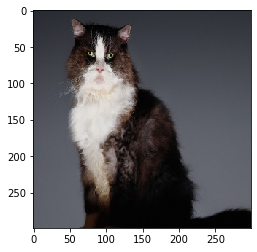

Le modèle prédit :  [[('n02123394', 'Persian_cat', 0.5248934), ('n02123045', 'tabby', 0.3237795), ('n02124075', 'Egyptian_cat', 0.052419126), ('n02123159', 'tiger_cat', 0.016731415), ('n04040759', 'radiator', 0.006175405)]]


In [8]:
x = chargementImage()

y = iv3.predict(x)
t = decode_predictions(y)
print("Le modèle prédit : ",t)

In [9]:
x.shape
#adv = Creation_Attaque_Adverse(x)

(1, 299, 299, 3)

In [15]:
test = np.random.rand(1, 299, 299, 3)

In [11]:
x[0:1][0:1][0:1][0:1]
test*0.0001
test[0][0][0][0:1]

array([0.68212557])

In [12]:
adv = x+test
adv = np.clip(test, x-0.01, x+0.01)

## Prediction après attaque

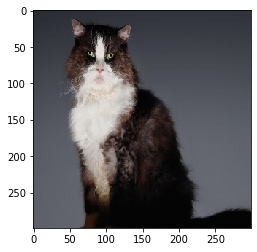

Le modèle prédit :  [[('n03950228', 'pitcher', 1.0), ('n06359193', 'web_site', 1.3446036e-10), ('n04131690', 'saltshaker', 8.437099e-12), ('n02123394', 'Persian_cat', 2.7038256e-14), ('n04099969', 'rocking_chair', 7.8045134e-16)]]


In [13]:
adv /= 2
adv += 0.5
adv *= 255
plt.imshow(adv[0].astype(np.uint8))
plt.show()

y = iv3.predict(adv)
t = decode_predictions(y)

print("Le modèle prédit : ",t)